In [3]:
import numpy as np
import pandas as pd
import math
from math import factorial
import torch
import torch.nn as nn
import torch.nn.functional as F
import transformers

import matplotlib.pyplot as plt

In [4]:
sym_severity = pd.read_csv('Symptom-severity.csv')
di_sym = pd.read_csv('dataset.csv')
di_desc = pd.read_csv('symptom_Description.csv')
di_prec = pd.read_csv('symptom_precaution.csv')

In [5]:
symptoms = list(sym_severity['Symptom'])
diseases = list(di_sym['Disease'].unique())

In [6]:
print('there are {} symptoms described in the dataset'.format(len(symptoms)))
print('there are {} diseases described in the dataset'.format(len(diseases)))

there are 133 symptoms described in the dataset
there are 41 diseases described in the dataset


In [7]:
# construct adjaciency matrix
adj_mat = np.zeros((133,41))
for i in range(len(di_sym)):
    for j in range(1, 18):
        disease = di_sym.iloc[i,0]
        symptom = di_sym.iloc[i,j]
        if pd.notnull(symptom):
            symptom = symptom.replace(' ','')
            dis_index = diseases.index(disease)
            sym_index = symptoms.index(symptom)
            adj_mat[sym_index, dis_index] += 1
        else:
            pass

Text(0, 0.5, 'symptom')

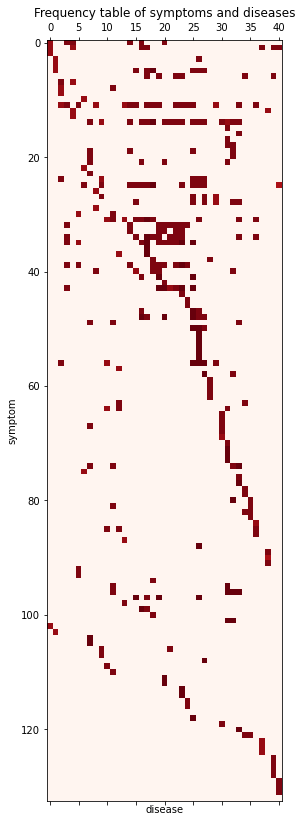

In [8]:
fig = plt.figure(figsize=(7,14))
ax = fig.add_subplot()
ax.matshow(adj_mat, cmap='Reds')
ax.set_title('Frequency table of symptoms and diseases')
ax.set_xlabel('disease')
ax.set_ylabel('symptom')

Text(0.5, 1.0, 'Probability distribution of diseases')

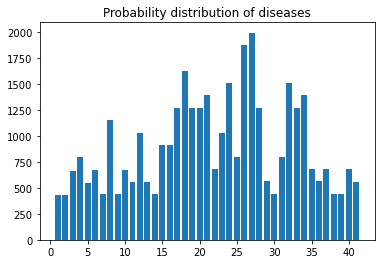

In [9]:
plt.bar(np.arange(1,42),adj_mat.sum(axis=0))
plt.title('Probability distribution of diseases')

Text(0.5, 1.0, 'Probability distribution of symptoms')

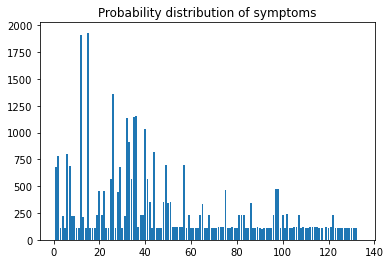

In [10]:
plt.bar(np.arange(1,134),adj_mat.sum(axis=1))
plt.title('Probability distribution of symptoms')

## Predict disease based on Symptom Label

In [11]:
def doctor_bayes(adj_mat, symptom_list, symptoms, diseases):
    sym = [symptoms.index(s) for s in symptom_list]
    p_dis = adj_mat.sum(axis=0) / adj_mat.sum()
    p_sym = adj_mat.sum(axis=1) / adj_mat.sum()
    dist = []
    for i in range(41):
        # compute bayes probability
        prob = np.prod((adj_mat[:,i]/ adj_mat[:,i].sum())[sym])*p_dis[i] / np.prod(p_sym[sym])
        dist.append(prob)
    if sum(dist) == 0:
        return 'I have no Idea'
    else:
        idx = dist.index(max(dist))
        return diseases[idx]

In [12]:
doctor_bayes(adj_mat, ['fatigue', 'mood_swings'], symptoms, diseases)

'Hyperthyroidism'

In [13]:
doctor_bayes(adj_mat, ['itching', 'skin_rash'], symptoms, diseases)

'Fungal infection'

In [14]:
doctor_bayes(adj_mat, ['fatigue', 'high_fever'], symptoms, diseases)

'Bronchial Asthma'

In [15]:
doctor_bayes(adj_mat, ['fatigue', 'high_fever', 'itching', 'coma'], symptoms, diseases)

'I have no Idea'